In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
Train_path = '/content/drive/MyDrive/Data_Science/Computer_Vision/Face_Recognition/Train'
Test_path = '/content/drive/MyDrive/Data_Science/Computer_Vision/Face_Recognition/Test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Data_Science/Computer_Vision/Face_Recognition/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Data_Science/Computer_Vision/Face_Recognition/Train/Teresa',
 '/content/drive/MyDrive/Data_Science/Computer_Vision/Face_Recognition/Train/Priyanka',
 '/content/drive/MyDrive/Data_Science/Computer_Vision/Face_Recognition/Train/Kalam']

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
model = Model(inputs = vgg.input,  outputs = prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_Science/Computer_Vision/Face_Recognition/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_Science/Computer_Vision/Face_Recognition/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 3 images belonging to 3 classes.


In [ ]:
model_fit = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 1.4882e-04 - accuracy: 1.0000 - val_loss: 0.5103 - val_accuracy: 0.6667
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5411 - val_accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 5.7971e-05 - accuracy: 1.0000 - val_loss: 0.5693 - val_accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 3.1789e-07 - accuracy: 1.0000 - val_loss: 0.5962 - val_accuracy: 0.6667
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 2.8199e-04 - accuracy: 1.0000 - val_loss: 0.6183 - val_accuracy: 0.6667


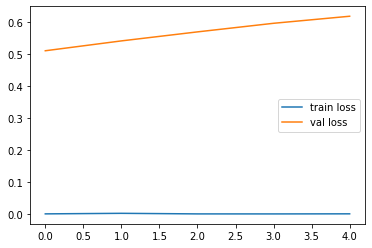

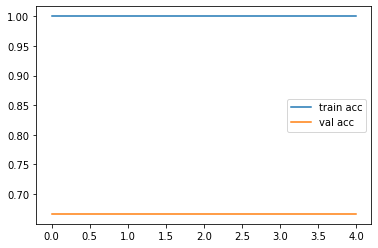

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('Face_Recognition_Using_VGG16_And_OpenCV.h5')